<a href="https://colab.research.google.com/github/andrastuu/Thesisproject/blob/main/Image_processing_unsupported_wiener_chanvese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import numpy as np
from skimage.restoration import unsupervised_wiener
from skimage.filters import gaussian
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Open h5 file in read mode
with h5py.File('/content/drive/MyDrive/Galaxy10_DECals.h5', 'r') as f:
    images = f['images'][:]



  0%|          | 0/17736 [00:00<?, ?it/s]

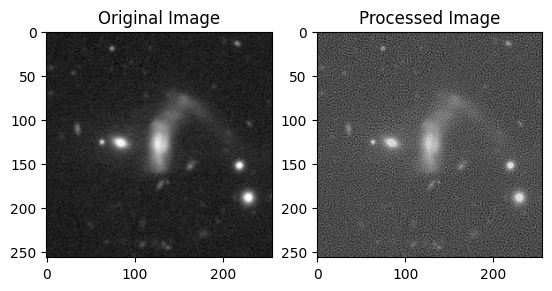

  0%|          | 1/17736 [00:00<2:40:23,  1.84it/s]

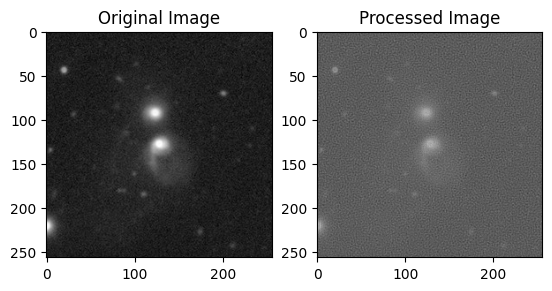

  0%|          | 2/17736 [00:00<2:23:15,  2.06it/s]

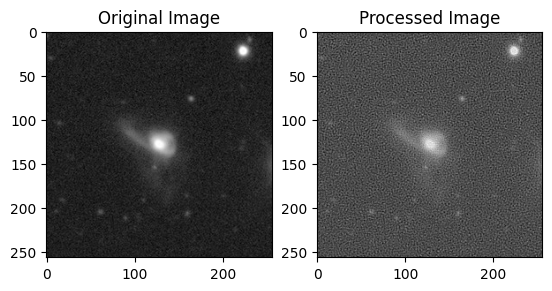

  0%|          | 3/17736 [00:01<2:22:07,  2.08it/s]

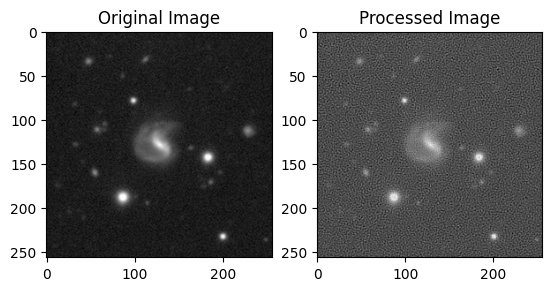

  0%|          | 4/17736 [00:01<2:17:56,  2.14it/s]

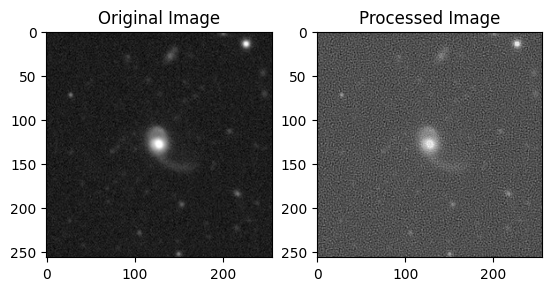

100%|██████████| 17736/17736 [35:56<00:00,  8.23it/s]


Processed images saved successfully.


In [ ]:
import scipy.ndimage as ndi
from tqdm import tqdm  # Import tqdm for the progress bar

# Create an empty array to store the processed images
processed_images = np.zeros((len(images), images.shape[1], images.shape[2]), dtype=np.float32)

# Create a Gaussian PSF
psf = np.zeros((5, 5))
psf[2, 2] = 1
psf = ndi.gaussian_filter(psf, 1)

# Normalize PSF
psf /= psf.sum()

# Process all images and store in the processed_images array
for i, img in tqdm(enumerate(images), total=len(images)):  # Add a progress bar
    # Convert image to grayscale if it has multiple channels
    if len(img.shape) > 2:
        img_gray = rgb2gray(img)
    else:
        img_gray = img

    # Normalize the grayscale image to the range [0, 1]
    img_gray = img_gray.astype(np.float32) / 255.0

    # Apply unsupervised Wiener filter
    filtered_img, _ = unsupervised_wiener(img_gray, psf)

    # Store processed image in the processed_images array
    processed_images[i] = filtered_img

    # Plot the first 5 images before and after processing
    if i < 5:
        fig, axes = plt.subplots(1, 2)
        axes[0].imshow(img_gray, cmap='gray')
        axes[0].set_title('Original Image')
        axes[1].imshow(filtered_img, cmap='gray')
        axes[1].set_title('Processed Image')
        plt.show()

# Save processed images as a single numpy array
output_path = '/content/drive/MyDrive/unsup_wiener_processed_images.npy'  # Specify the output file path
np.save(output_path, processed_images)
print("Processed images saved successfully.")


Processing images:   0%|          | 0/17736 [00:00<?, ?it/s]<ipython-input-8-3f078243239c>:30: FutureWarning: `max_iter` is a deprecated argument name for `chan_vese`. It will be removed in version 1.0. Please use `max_num_iter` instead.
  cv = chan_vese(img_gray, mu=mu, lambda1=lambda1, lambda2=lambda2, tol=tol, max_iter=max_iter, dt=0.5, init_level_set="checkerboard", extended_output=True)


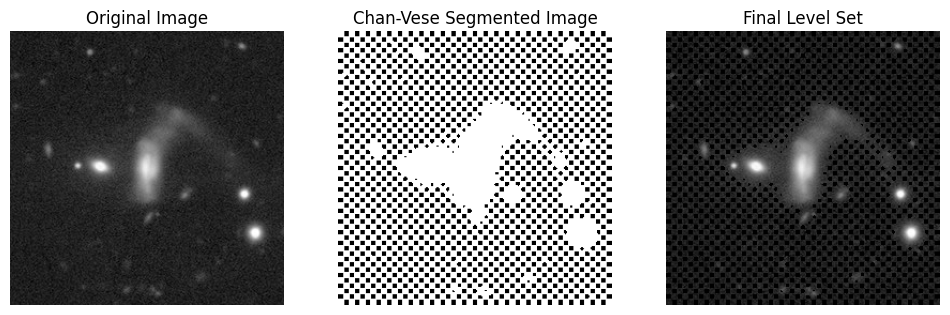

Processing images:   0%|          | 1/17736 [00:00<2:55:11,  1.69it/s]

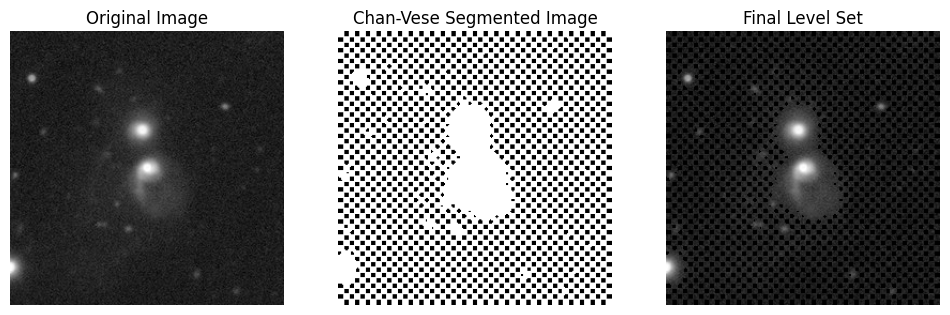

Processing images:   0%|          | 2/17736 [00:01<2:51:28,  1.72it/s]

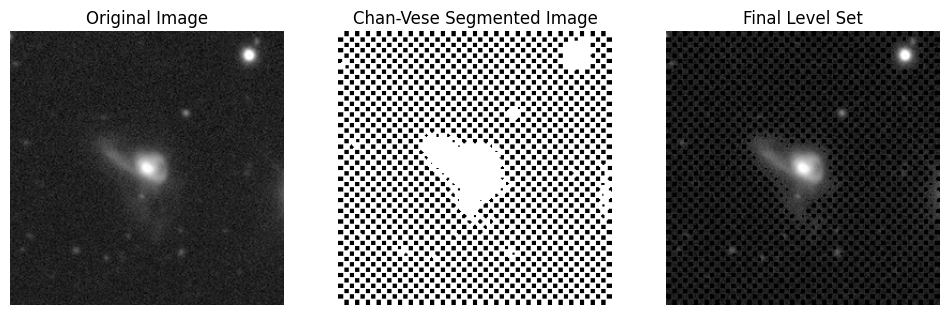

Processing images:   0%|          | 3/17736 [00:01<2:49:37,  1.74it/s]

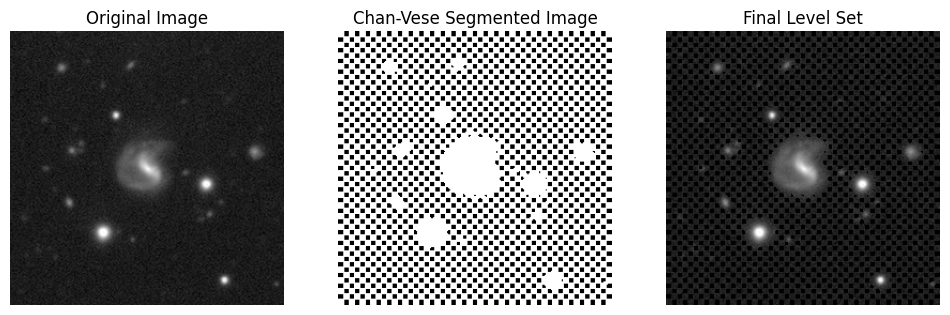

Processing images:   0%|          | 4/17736 [00:02<3:09:50,  1.56it/s]

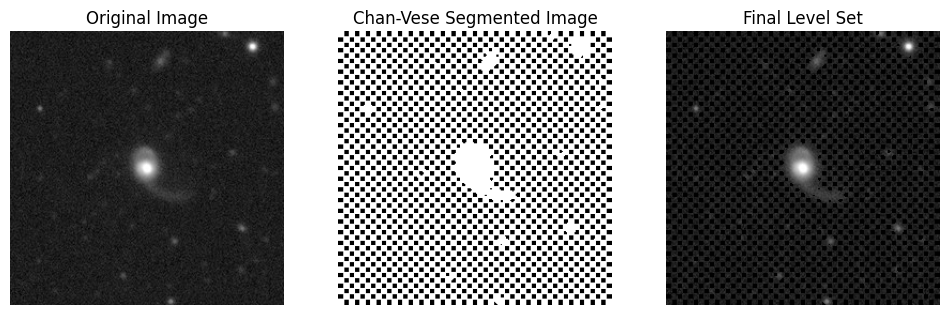

Processing images: 100%|██████████| 17736/17736 [1:24:36<00:00,  3.49it/s]


Processed level set images saved successfully.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.segmentation import chan_vese
import h5py
from tqdm import tqdm

# Create an empty array to store the processed level set images
level_set_images = np.zeros((len(images), images.shape[1], images.shape[2]), dtype=np.float32)

# Parameters
mu = 0.5
lambda1 = 1
lambda2 = 2
tol = 1e-3
max_iter = 200

# Process images with a progress bar
for i, img in tqdm(enumerate(images), total=len(images), desc="Processing images"):
    # Convert image to grayscale if it has multiple channels
    if len(img.shape) > 2:
        img_gray = rgb2gray(img)
    else:
        img_gray = img

    # Normalize the grayscale image to the range [0, 1]
    img_gray = img_gray.astype(np.float32) / 255.0

    # Perform Chan-Vese segmentation
    cv = chan_vese(img_gray, mu=mu, lambda1=lambda1, lambda2=lambda2, tol=tol, max_iter=max_iter, dt=0.5, init_level_set="checkerboard", extended_output=True)

    # Store processed level set image in the level_set_images array
    level_set_images[i] = img_gray * cv[0]  # Apply the mask to the original image

    # Plot the first 5 images before and after processing
    if i < 5:
        fig, axes = plt.subplots(1, 3, figsize=(12, 12))
        axes[0].imshow(img_gray, cmap='gray')
        axes[0].set_title('Original Image')
        axes[0].axis('off')
        axes[1].imshow(cv[0], cmap='gray')
        axes[1].set_title('Chan-Vese Segmented Image')
        axes[1].axis('off')
        axes[2].imshow(img_gray * cv[0], cmap='gray')  # Plot the original image with the mask applied
        axes[2].set_title('Final Level Set')
        axes[2].axis('off')
        plt.show()


# Save processed level set images as a single numpy array
output_path = '/content/drive/MyDrive/level_set_images.npy'  # Specify the output file path
np.save(output_path, level_set_images)
print("Processed level set images saved successfully.")
